In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [7]:
df = pd.read_csv('webscrappeddata.csv')

## 🔍 Enhanced Exploratory Data Analysis

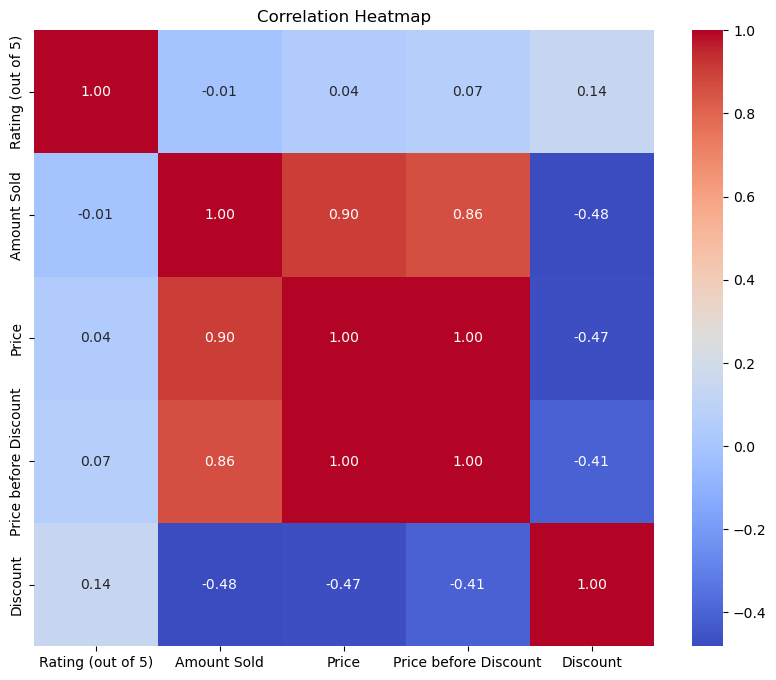

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

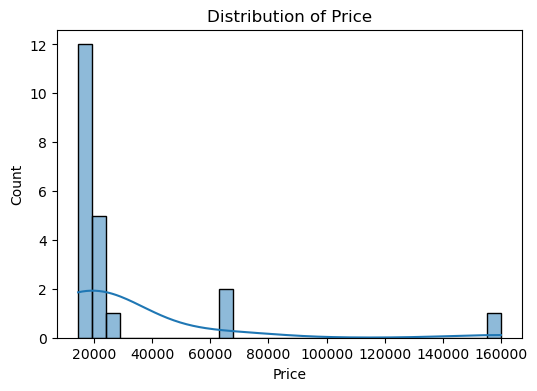

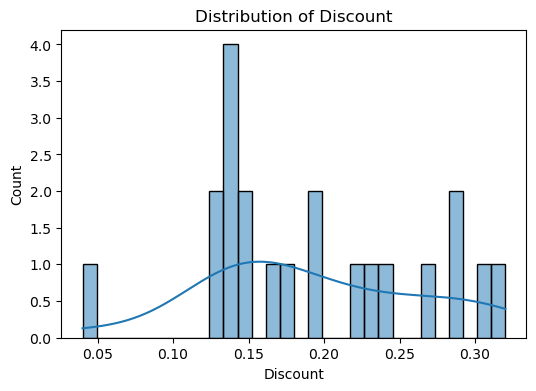

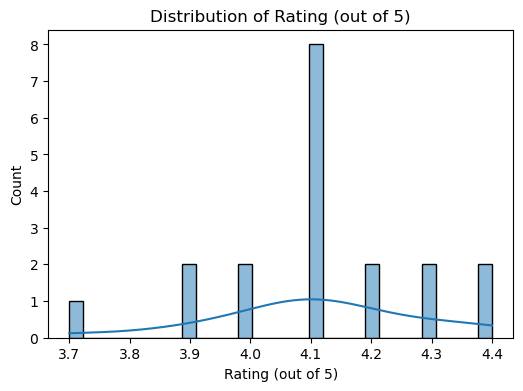

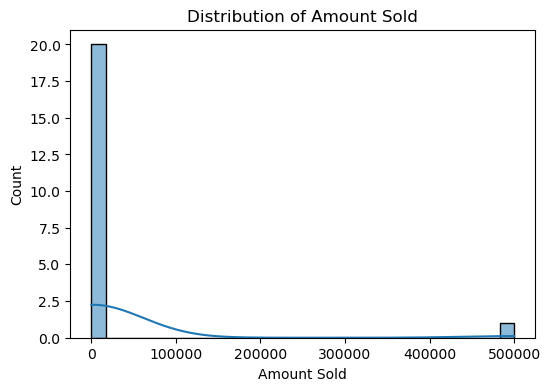

In [9]:
# Distribution Plots
num_features = ['Price', 'Discount', 'Rating (out of 5)', 'Amount Sold']
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

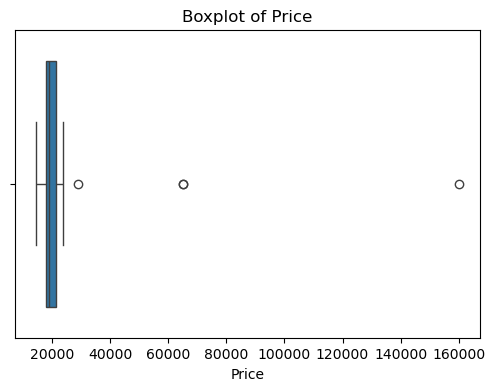

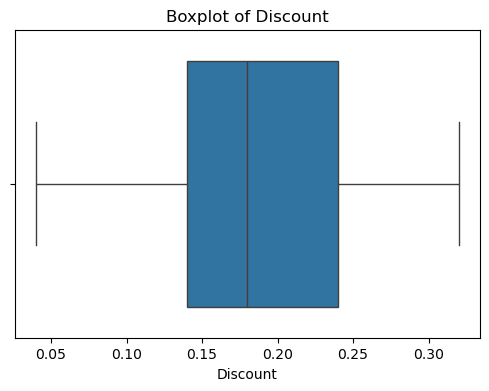

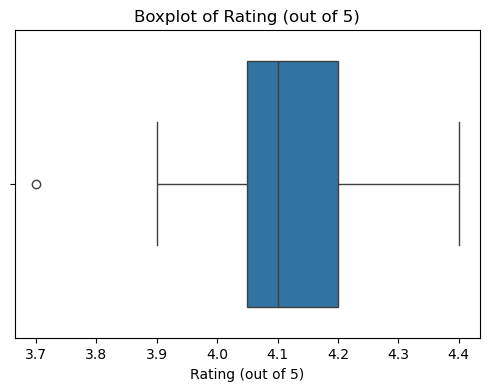

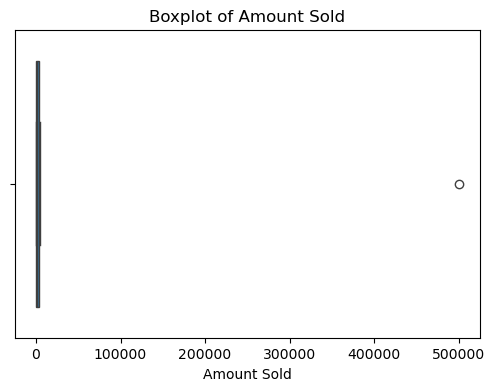

In [10]:
# Boxplots to check for outliers
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

## 🧠 Feature Engineering

In [11]:
# Add price after discount
df['Price_After_Discount'] = df['Price'] * (1 - df['Discount'] / 100)

## ⚙️ Model Comparison with Multiple Regressors

In [15]:
%pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 262.1 kB/s eta 0:09:31
   ---------------------------------------- 0.5/150.0 MB 262.1 kB/s e

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 0ea74e97f95b1eddfd27a46b7f22f72ec5a5322e1dc7cb41c9c23fb580763df9
             Got        ac8842d7ec77ef4ab236c778681de26a716e928bc08da124d04f8c54a1c975b1

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 0ea74e97f95b1eddfd27a46b7f22f72ec5a5322e1dc7cb41c9c23fb580763df9
             Got        dbcfe5584cf0a62dc7131f3df0f7431d207772dc2c7c08f58b055407dff558fd



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 349.5 kB/s eta 0:07:08
   ---------------------------------------- 0.5/150.0 MB 349.5 kB/s eta 0:07:08
   ---------------------------------------- 0.5/150.0 MB 349.5 kB/s eta 0:07:08
   ---------------------------------------- 0.5/150.0 MB 349.5 kB/s eta 0:07:08
   ---------------------------------------- 0.5/150.0 MB 349.5 kB/s eta 0:07:08
   -----------------------------

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 0ea74e97f95b1eddfd27a46b7f22f72ec5a5322e1dc7cb41c9c23fb580763df9
             Got        1c5b8afe4128f8a6ee94eefce95390b3c1748bffc7e21dbc9c7dbf964866cc9c



In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%pip install xgboost
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Assuming grid_search.best_params_ is not defined, we will use default parameters for DecisionTreeRegressor
grid_search = {'best_params_': {}}  # Placeholder for grid_search.best_params_

from sklearn.impute import SimpleImputer

# Handle missing values in X
imputer = SimpleImputer(strategy='mean')  # You can change the strategy to 'median' or 'most_frequent' if needed
X = pd.DataFrame(imputer.fit_transform(df[num_features]), columns=num_features)

# Target variable (y) remains the same
y = df[feature]

models = {
    'Decision Tree': DecisionTreeRegressor(**grid_search['best_params_'], random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results[name] = scores
    print(f"{name} | Mean R²: {scores.mean():.4f} | Std: {scores.std():.4f}")

Note: you may need to restart the kernel to use updated packages.
Decision Tree | Mean R²: 0.4679 | Std: 0.6281
Random Forest | Mean R²: 0.6000 | Std: 0.4800
Linear Regression | Mean R²: 1.0000 | Std: 0.0000
XGBoost | Mean R²: 0.4626 | Std: 0.6283


## 📊 Residual Analysis

In [19]:
# Residuals for the best model (Decision Tree from GridSearch)
best_model = DecisionTreeRegressor(**grid_search['best_params_'], random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Actual")
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.show()

NameError: name 'X_train' is not defined